In [35]:
%matplotlib inline

In [36]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt

In [37]:
end = dt.datetime.now()
start = dt.datetime(end.year-5,end.month,end.day)

In [38]:
start

datetime.datetime(2015, 10, 10, 0, 0)

In [39]:
df = reader.get_data_yahoo('BTC-USD',start,end)

In [40]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-08,244.227997,242.121994,242.498001,243.931000,1.735310e+07,243.931000
2015-10-09,245.319000,243.074005,243.740005,244.940994,1.591270e+07,244.940994
2015-10-10,247.242996,244.151993,244.742004,247.050003,1.682730e+07,247.050003
2015-10-11,247.453995,245.179001,246.875000,245.307999,1.738830e+07,245.307999
2015-10-12,250.235992,243.757004,245.199997,249.507996,2.819850e+07,249.507996
...,...,...,...,...,...,...
2020-10-04,10804.000977,10646.443359,10688.034180,10804.000977,1.938519e+10,10804.000977
2020-10-05,10803.456055,10565.197266,10799.778320,10621.664062,2.226496e+10,10621.664062
2020-10-06,10687.268555,10591.963867,10619.803711,10679.136719,1.763439e+10,10679.136719


In [41]:
from fbprophet import Prophet

In [42]:
model = Prophet()

In [43]:
model

In [44]:
df = df.reset_index()

In [45]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-10-08,244.227997,242.121994,242.498001,243.931000,1.735310e+07,243.931000
1,2015-10-09,245.319000,243.074005,243.740005,244.940994,1.591270e+07,244.940994
2,2015-10-10,247.242996,244.151993,244.742004,247.050003,1.682730e+07,247.050003
3,2015-10-11,247.453995,245.179001,246.875000,245.307999,1.738830e+07,245.307999
4,2015-10-12,250.235992,243.757004,245.199997,249.507996,2.819850e+07,249.507996
...,...,...,...,...,...,...,...
1822,2020-10-04,10804.000977,10646.443359,10688.034180,10804.000977,1.938519e+10,10804.000977
1823,2020-10-05,10803.456055,10565.197266,10799.778320,10621.664062,2.226496e+10,10621.664062
1824,2020-10-06,10687.268555,10591.963867,10619.803711,10679.136719,1.763439e+10,10679.136719
1825,2020-10-07,10939.799805,10569.823242,10677.625000,10923.627930,2.196212e+10,10923.627930


In [46]:
df[['ds','y']] = df[['Date','Adj Close']]

In [47]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2015-10-08,244.227997,242.121994,242.498001,243.931000,1.735310e+07,243.931000,2015-10-08,243.931000
1,2015-10-09,245.319000,243.074005,243.740005,244.940994,1.591270e+07,244.940994,2015-10-09,244.940994
2,2015-10-10,247.242996,244.151993,244.742004,247.050003,1.682730e+07,247.050003,2015-10-10,247.050003
3,2015-10-11,247.453995,245.179001,246.875000,245.307999,1.738830e+07,245.307999,2015-10-11,245.307999
4,2015-10-12,250.235992,243.757004,245.199997,249.507996,2.819850e+07,249.507996,2015-10-12,249.507996
...,...,...,...,...,...,...,...,...,...
1822,2020-10-04,10804.000977,10646.443359,10688.034180,10804.000977,1.938519e+10,10804.000977,2020-10-04,10804.000977
1823,2020-10-05,10803.456055,10565.197266,10799.778320,10621.664062,2.226496e+10,10621.664062,2020-10-05,10621.664062
1824,2020-10-06,10687.268555,10591.963867,10619.803711,10679.136719,1.763439e+10,10679.136719,2020-10-06,10679.136719
1825,2020-10-07,10939.799805,10569.823242,10677.625000,10923.627930,2.196212e+10,10923.627930,2020-10-07,10923.627930


In [48]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future = model.make_future_dataframe(periods=120)

In [50]:
forecast = model.predict(future)

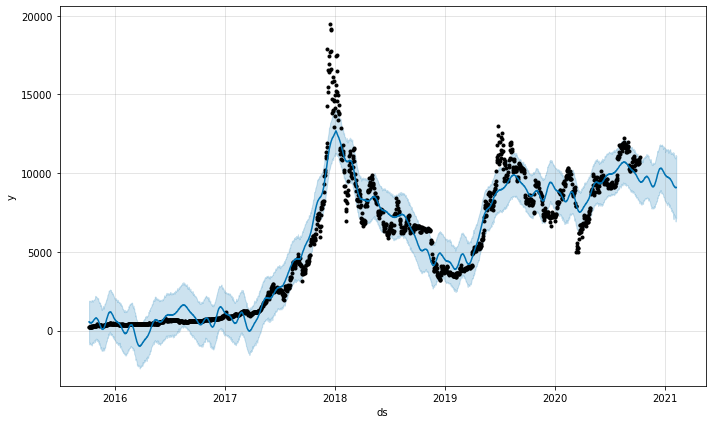

In [51]:
model.plot(forecast)
plt.show()